In [165]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [166]:
os.chdir('C:\\Users\\hp\\Documents\\R_and_PY_programming\\tushar\\binf_assignment_2')

In [167]:
df = pd.read_csv('AutoData.csv')
df_new = df.copy()

## Data description:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3
(Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.)
2. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes- benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
3. fuel-type: diesel, gas.
4. aspiration: std, turbo.
5. num-of-doors: four, two.
6. body-style: hardtop, wagon, sedan, hatchback, convertible.
7. drive-wheels: 4wd, fwd, rwd.
8. engine-location: front, rear.
9. wheel-base: continuous from 86.6 120.9.
10. length: continuous from 141.1 to 208.1. 11 width: continuous from 60.3 to 72.3.
12. height: continuous from 47.8 to 59.8.
13. curb-weight: continuous from 1488 to 4066.
14. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
15. num-of-cylinders: eight, five, four, six, three, twelve, two.
16. engine-size: continuous from 61 to 326.
17. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
18. bore: continuous from 2.54 to 3.94.
19. stroke: continuous from 2.07 to 4.17.
20. compression-ratio: continuous from 7 to 23.
21. horsepower: continuous from 48 to 288.
22. peak-rpm: continuous from 4150 to 6600.
23. city-mpg: continuous from 13 to 49.
24. highway-mpg: continuous from 16 to 54.
25. price: continuous from 5118 to 45400.

# <font color='red'>Exploratory Data Analysis (EDA)</font>

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [169]:
df.isna().sum().sum() # no missing values


0

In [170]:
df.duplicated().sum() # no duplicate values

0

In [171]:
# all numerical data columns
df._get_numeric_data().columns 

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [172]:
# all categorical data columns
set(df.columns) - set(df._get_numeric_data().columns) 

{'aspiration',
 'carbody',
 'cylindernumber',
 'doornumber',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'fueltype',
 'make'}

### NOTE:
### symboling is a catagorical variable, so we have to convert it from numerical to categorical feature.
### symboling: (-3, -2, -1, 0, 1, 2, 3)

In [173]:
df.symboling = df.symboling.astype(str)
print(df._get_numeric_data().columns)

df_new = df.copy()

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


### EDA of numerical data 

In [174]:
df_num_stats = df.describe()
print(df_num_stats)

        wheelbase   carlength    carwidth   carheight   curbweight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       enginesize   boreratio      stroke  compressionratio  horsepower  \
count  205.000000  205.000000  205.000000        205.000000  205.000000   
mean   126.907317    3.329756    3.255415         10.142537  104.117073   
std     41.642693    0.270844    0.313597          3.972040   39.544167   
min     61.000000    2.540000    2.070000          7.000000   48.0000

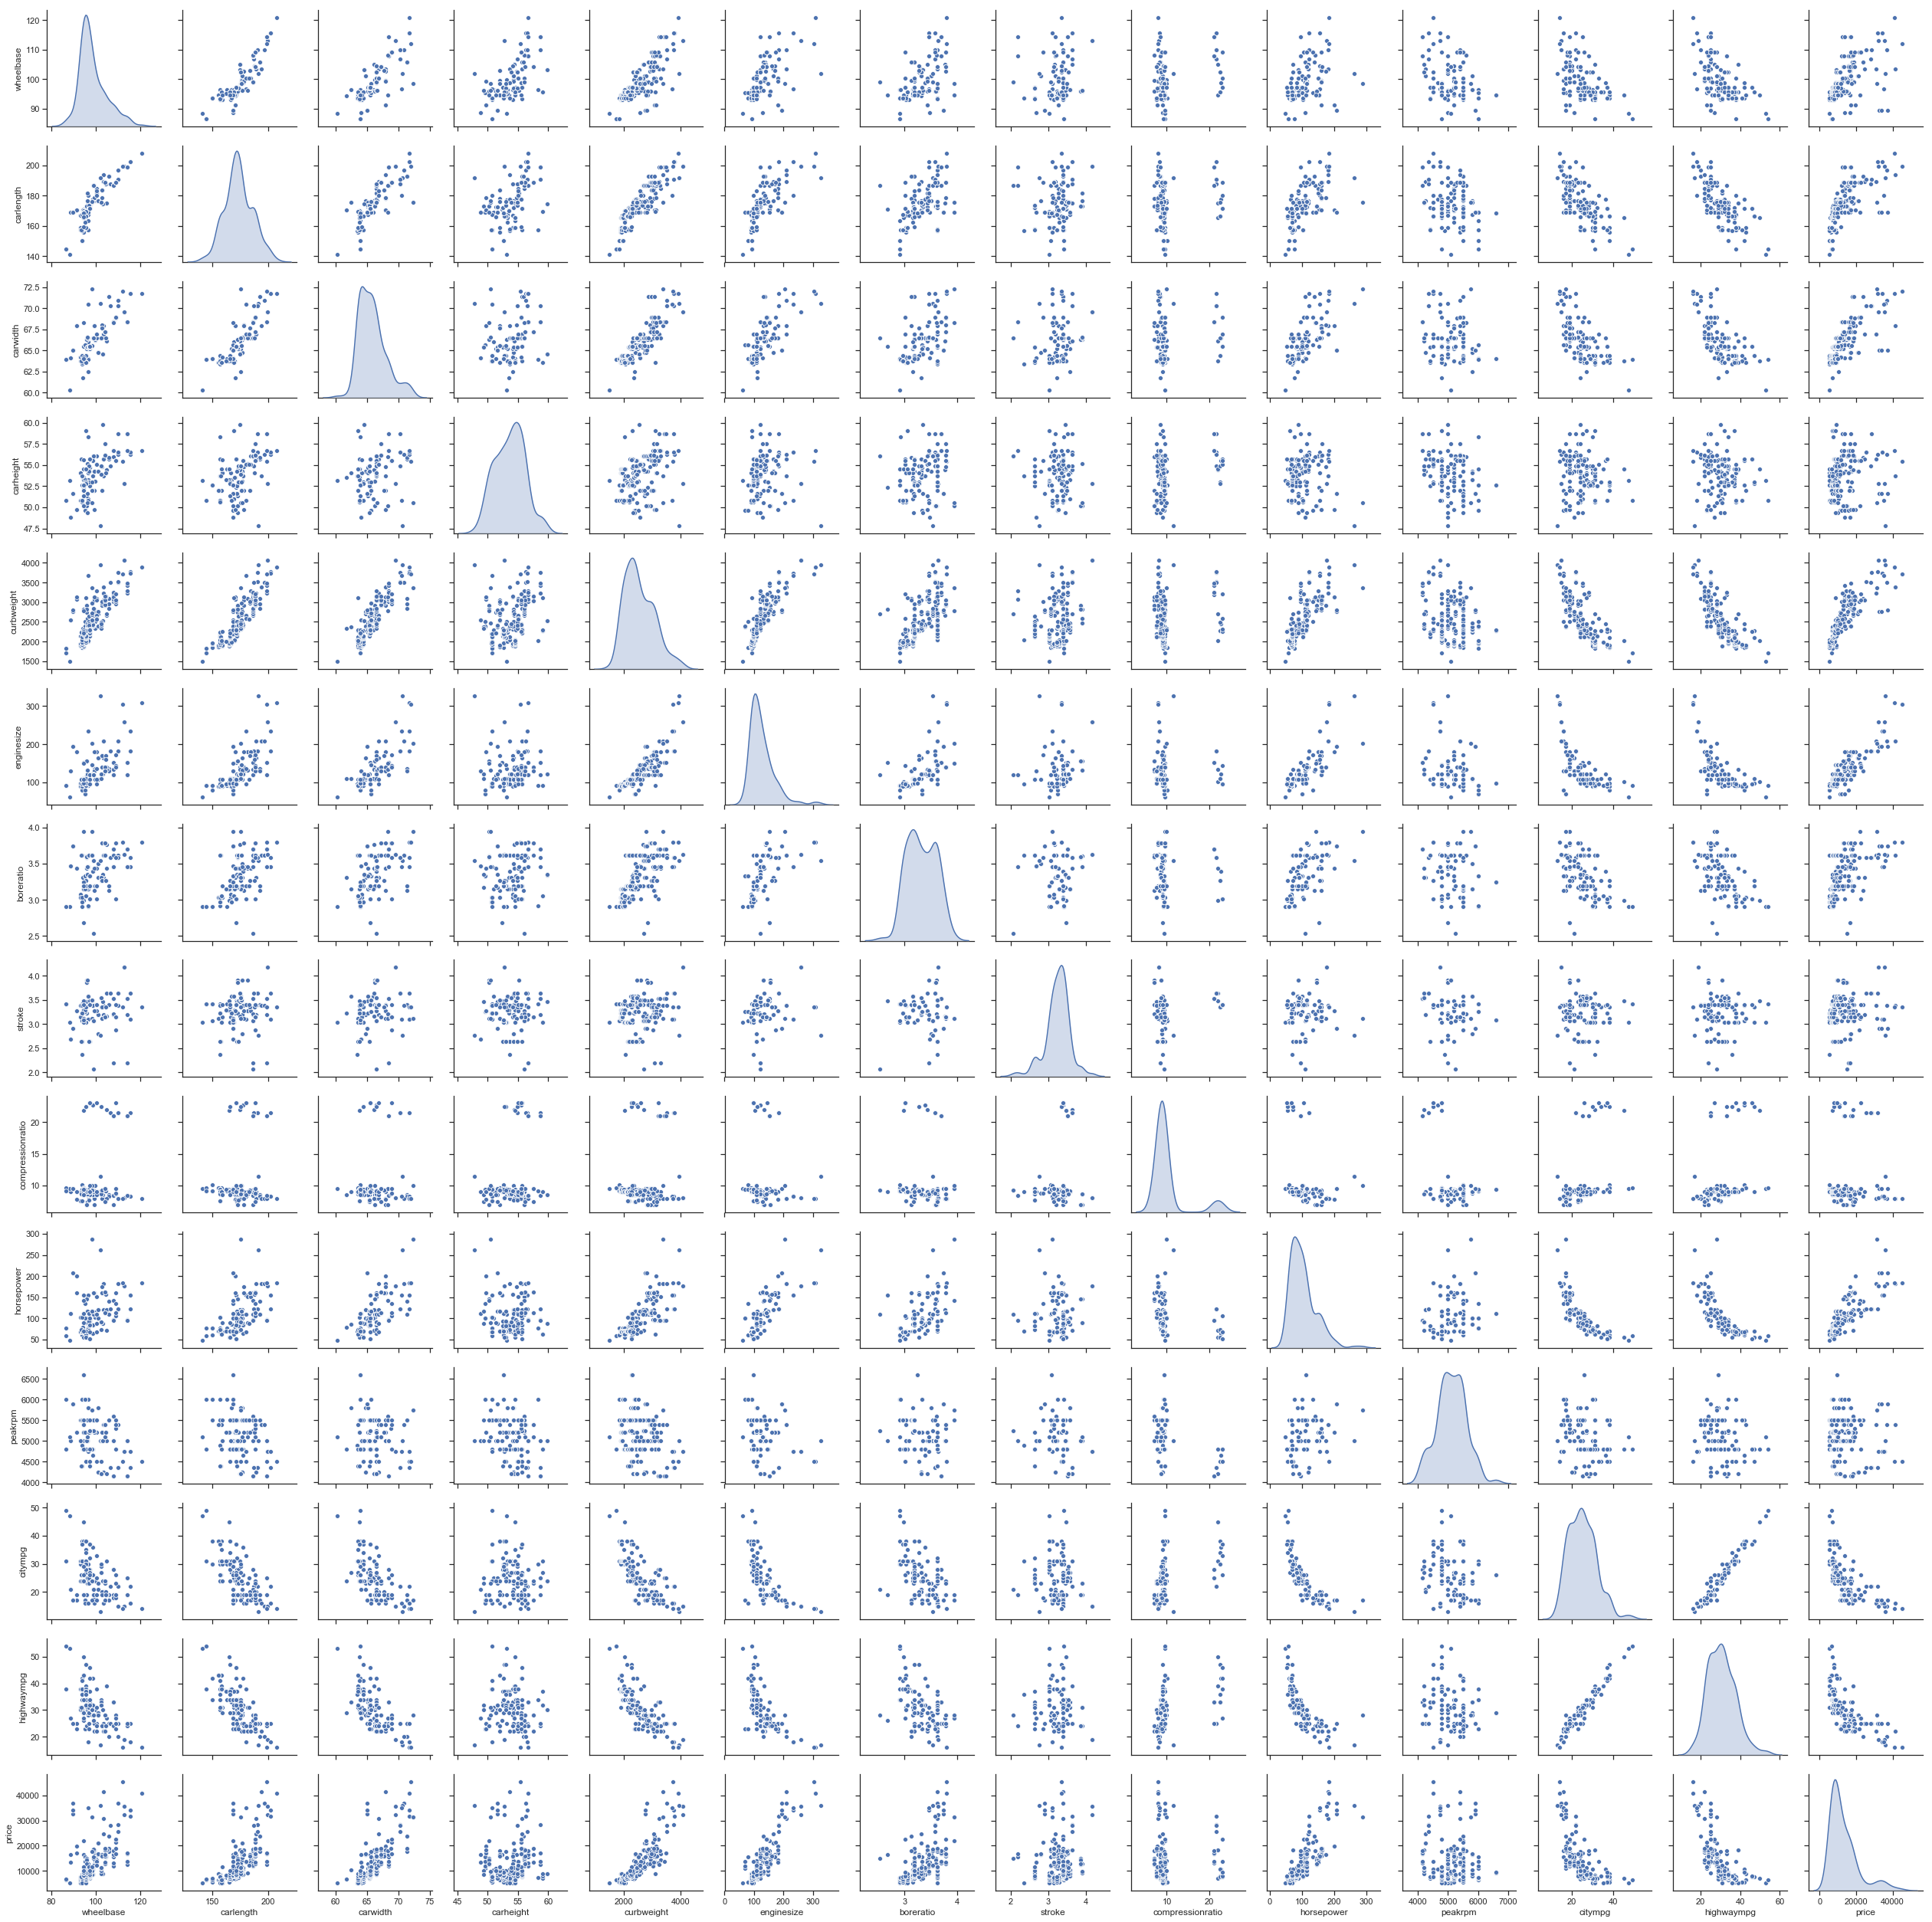

In [175]:
## pair plot to visualize all numerical data at a time
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[list(df._get_numeric_data().columns)], diag_kind="kde")

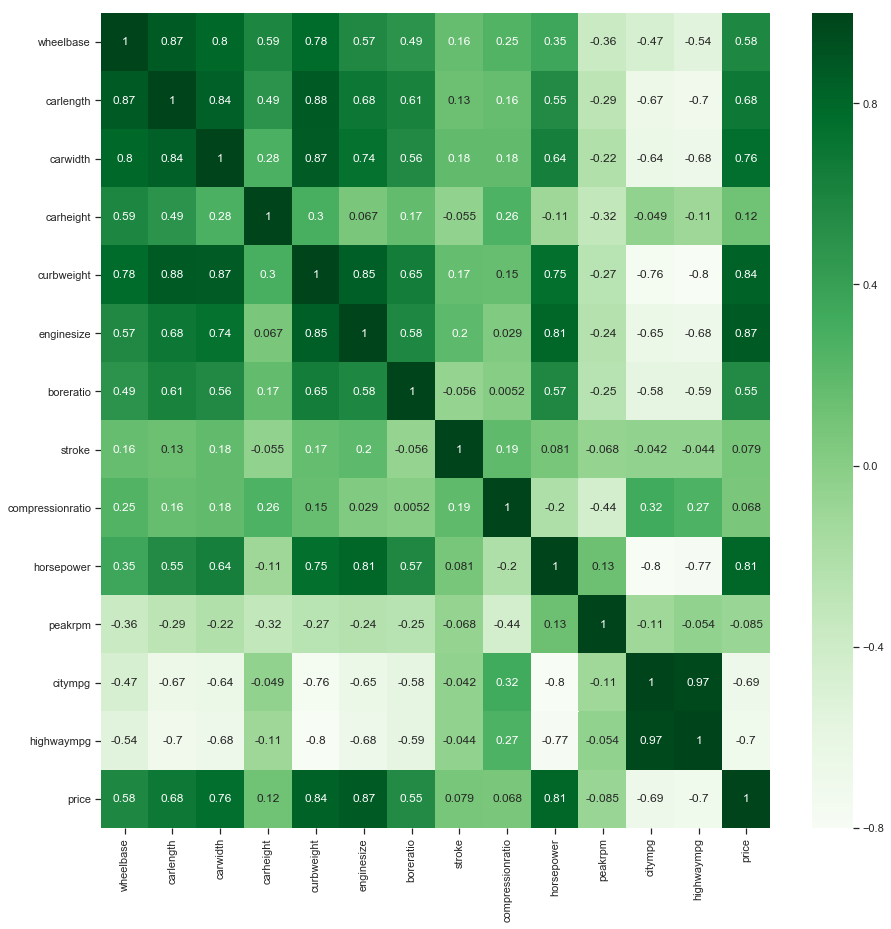

In [176]:
## heatmap to visualize all numerical data correlation
plt.figure(figsize=(15,15))
sns.heatmap(df[list(df._get_numeric_data().columns)].corr(), annot=True,cmap="Greens")
plt.show()

###### heatmap conclusion: carweight, enginesize, horsepower shows very high correlation with price

## outlier treatment of each numerical data

In [177]:
# this function will plot a subplot of boxplot,  distribution plot and joint plot between perticular feature and price for a numerical value
def num_plots(feature,xlable):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.boxplot(feature)
    plt.xlabel(xlable)
    plt.subplot(122)
    sns.kdeplot(feature,shade=True)
    plt.figure(figsize=(10,5))
    sns.jointplot(feature,df.price)


Inter Quantile Range (IQR):  7.900000000000006


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


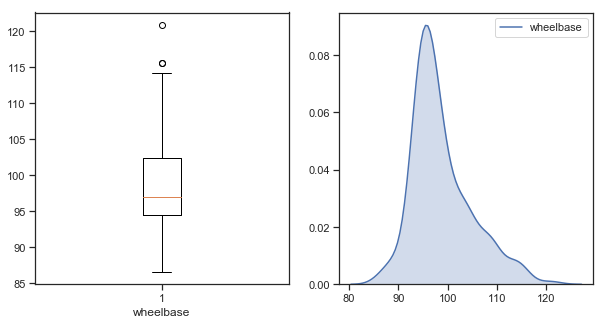

<Figure size 720x360 with 0 Axes>

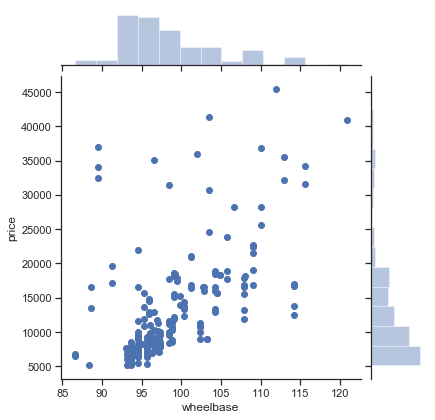

In [178]:
### wheelbase
num_plots(df.wheelbase,'wheelbase')# have some outliers

Q1 = df.wheelbase.quantile(0.25) # first quantile 
Q3 = df.wheelbase.quantile(0.75) # second quantile
IQR = Q3 - Q1 # inter quantile range (IQR)
print('Inter Quantile Range (IQR): ',IQR)
# values above 1.5*IQR to the Q3 are considered as outliers 

df.wheelbase[(df.wheelbase > (Q3 + 1.5 * IQR))] = df.wheelbase.quantile(0.95)

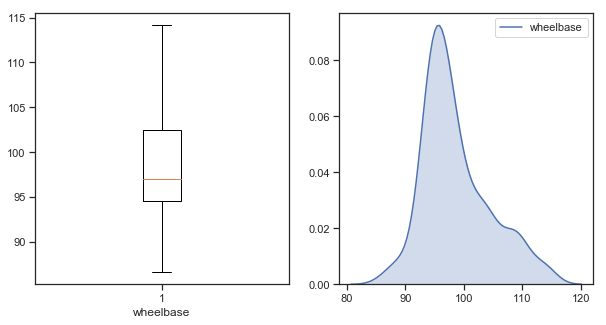

<Figure size 720x360 with 0 Axes>

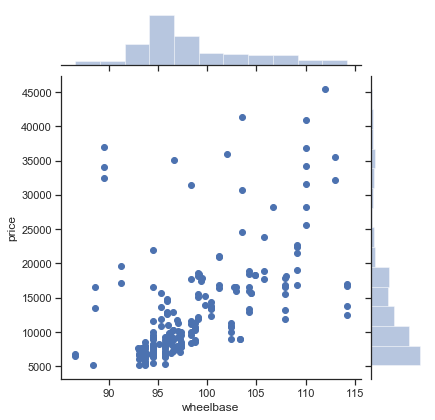

In [179]:
num_plots(df.wheelbase,'wheelbase') # outliers are removed for imputation of 3rd quantile value

16.799999999999983


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


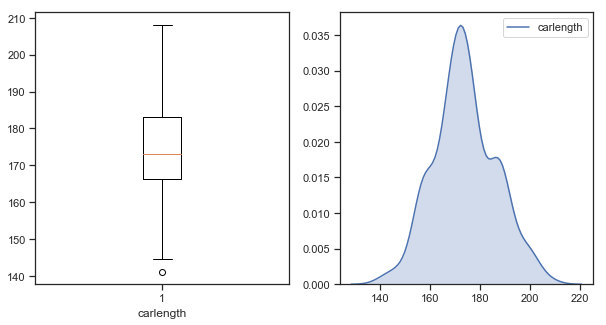

<Figure size 720x360 with 0 Axes>

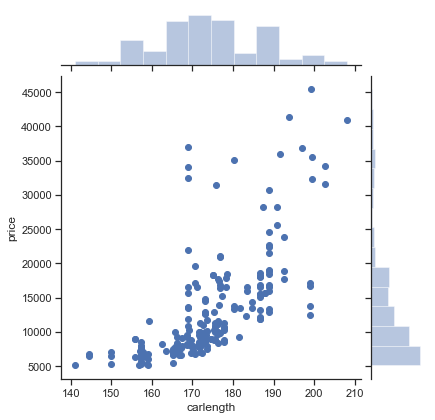

In [180]:
### carlength
num_plots(df.carlength,'carlength')  


Q1 = df.carlength.quantile(0.25) # first quantile 
Q3 = df.carlength.quantile(0.75) # second quantile
IQR = Q3 - Q1 # inter quantile range (IQR)
print(IQR)

# values below 1.5*IQR to the Q1 are considered as outliers 
df.carlength[(df.carlength < (Q1 - 1.5 * IQR))]
df.carlength[(df.carlength < (Q1 - 1.5 * IQR))] = Q1


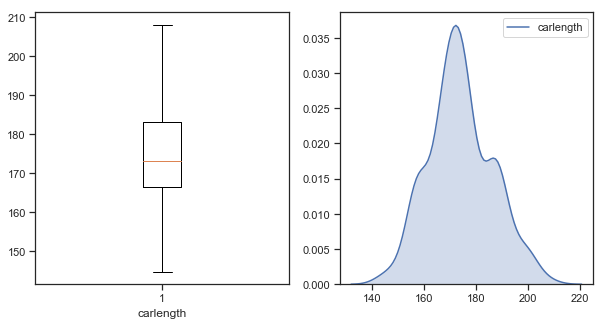

<Figure size 720x360 with 0 Axes>

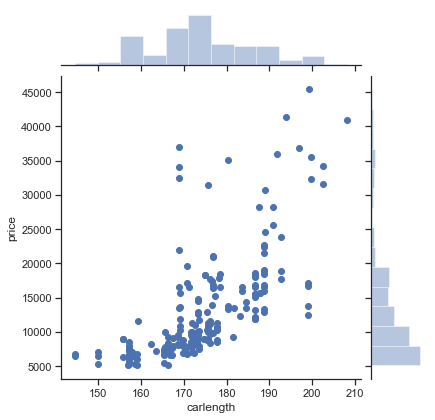

In [181]:
num_plots(df.carlength,'carlength')  # outliers are removed for imputation of 3rd quantile value

2.8000000000000114


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


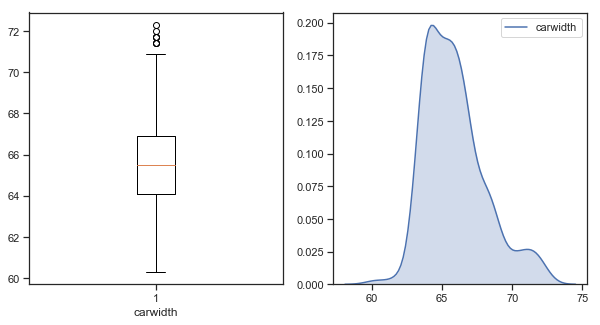

<Figure size 720x360 with 0 Axes>

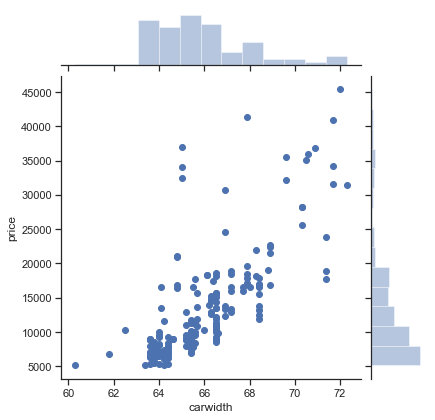

In [182]:
### carwidth
num_plots(df.carwidth,'carwidth')  


Q1 = df.carwidth.quantile(0.25) # first quantile 
Q3 = df.carwidth.quantile(0.75) # second quantile
IQR = Q3 - Q1 # inter quantile range (IQR)
print(IQR)


df.carwidth[(df.carwidth > (Q3 + 1.5 * IQR))]
df.carwidth[(df.carwidth > (Q3 + 1.5 * IQR))] = df.carwidth.quantile(0.75)


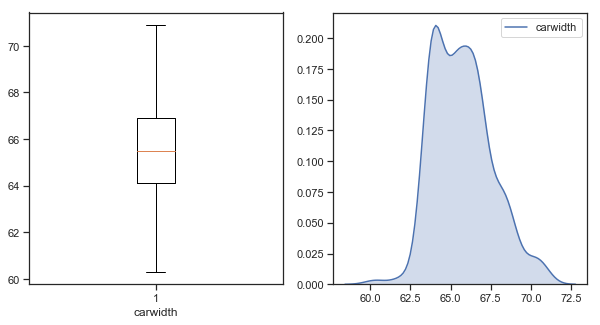

<Figure size 720x360 with 0 Axes>

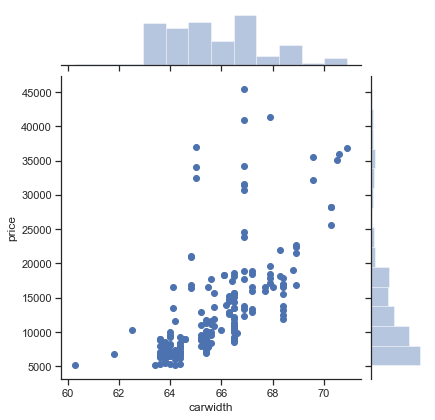

In [183]:
num_plots(df.carwidth,'carwidth')  # outliers are removed for imputation of 3rd quantile value

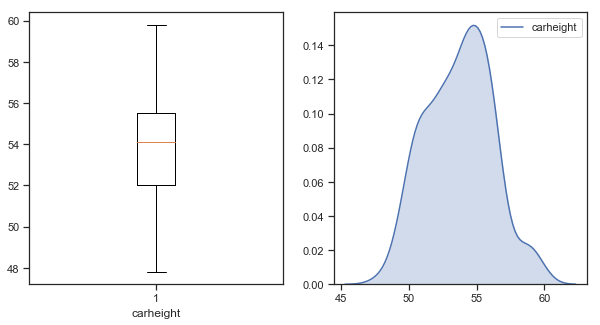

<Figure size 720x360 with 0 Axes>

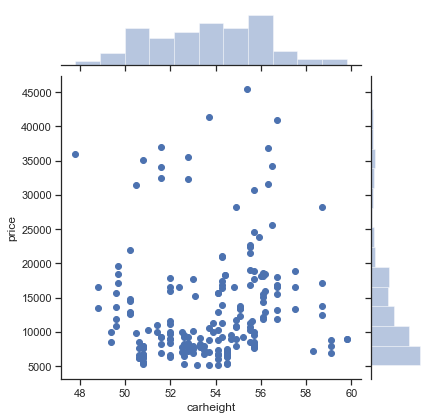

In [184]:
### carheight
num_plots(df.carheight,'carheight')   # no outliers


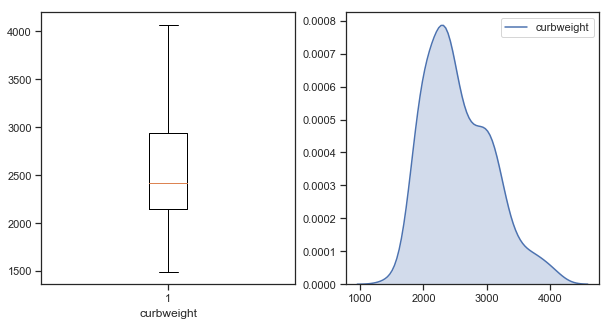

<Figure size 720x360 with 0 Axes>

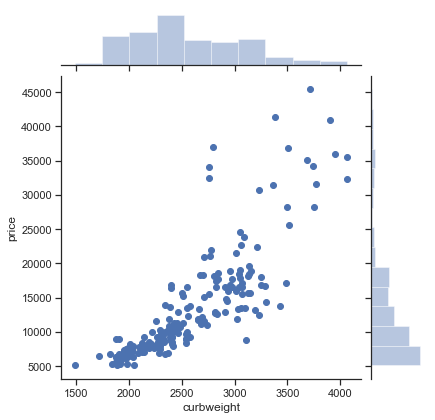

In [185]:
### curbweight
num_plots(df.curbweight,'curbweight') # no outliers


44.0


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


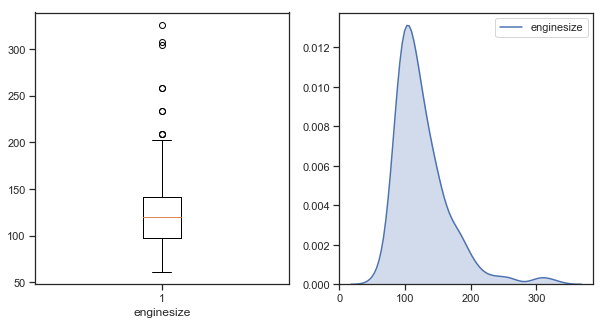

<Figure size 720x360 with 0 Axes>

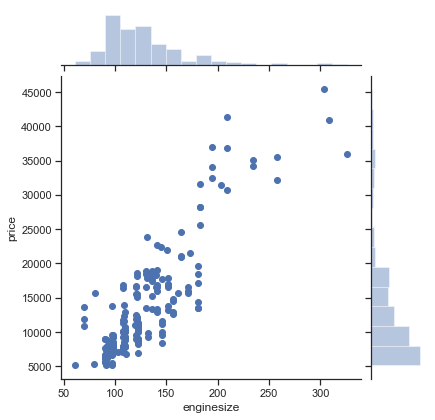

In [186]:
### enginesize 
num_plots(df.enginesize,'enginesize') 


Q1 = df.enginesize.quantile(0.25) # first quantile 
Q3 = df.enginesize.quantile(0.75) # second quantile
IQR = Q3 - Q1 # inter quantile range (IQR)
print(IQR)


df.enginesize[(df.enginesize > (Q3 + 1.5 * IQR))]
df.enginesize[(df.enginesize > (Q3 + 1.5 * IQR))] = df.enginesize.quantile(0.95)


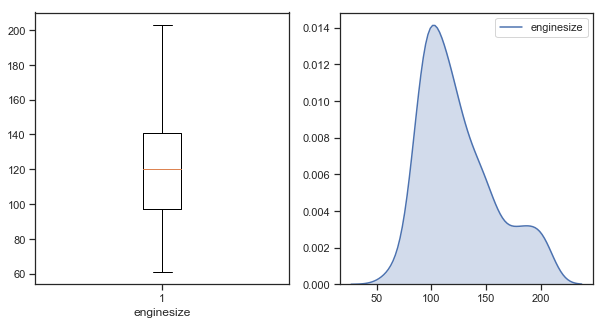

<Figure size 720x360 with 0 Axes>

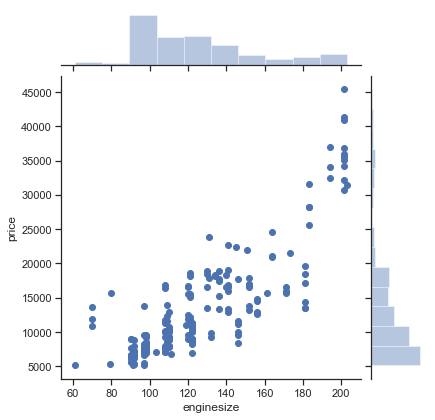

In [187]:
num_plots(df.enginesize,'enginesize')  # outliers are removed for imputation of 3rd quantile value

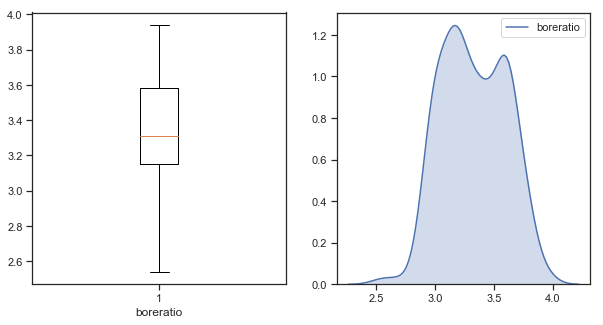

<Figure size 720x360 with 0 Axes>

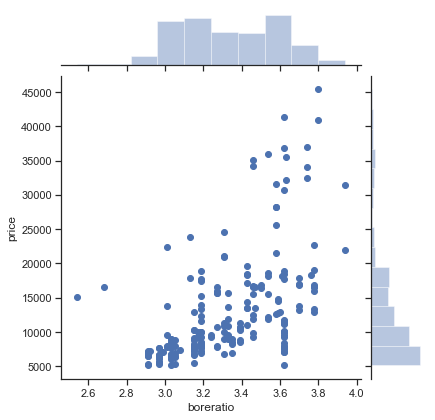

In [188]:
### boreratio

num_plots(df.boreratio,'boreratio') # no outliers



0.30000000000000027


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


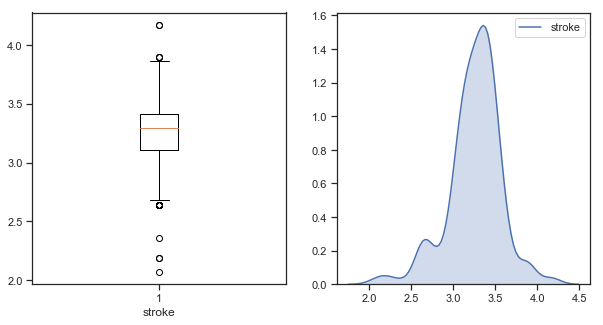

<Figure size 720x360 with 0 Axes>

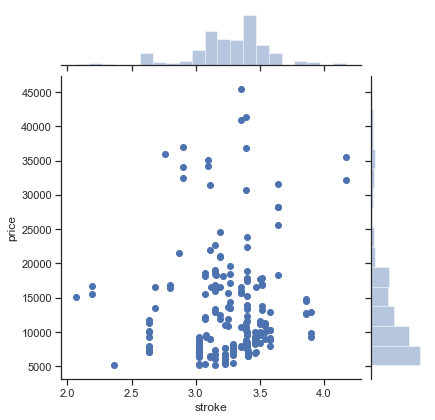

In [189]:
### stroke
num_plots(df.stroke,'stroke') 

# has both lower and upper outliers

Q1 = df.stroke.quantile(0.25) # first quantile 
Q3 = df.stroke.quantile(0.75) # second quantile
IQR = Q3 - Q1 # inter quantile range (IQR)
print(IQR)


# upper outlier
df.stroke[(df.stroke > (Q3 + 1.5 * IQR))]
df.stroke[(df.stroke > (Q3 + 1.5 * IQR))] = df.stroke.quantile(0.95)

# lower outlier
df.stroke[(df.stroke < (Q1 - 1.5 * IQR))]
df.stroke[(df.stroke < (Q1 - 1.5 * IQR))] = Q1


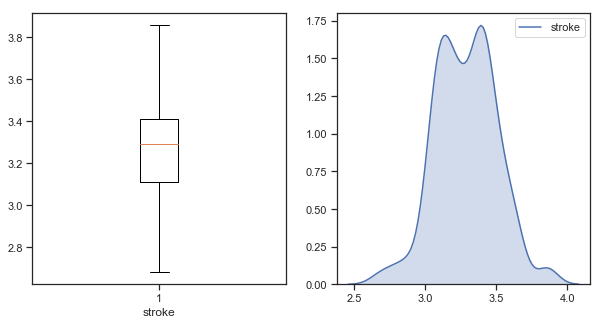

<Figure size 720x360 with 0 Axes>

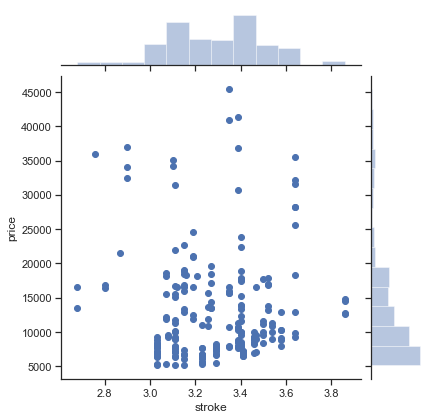

In [190]:
num_plots(df.stroke,'stroke')  # outliers are removed for imputation of 3rd quantile value


0.8000000000000007


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


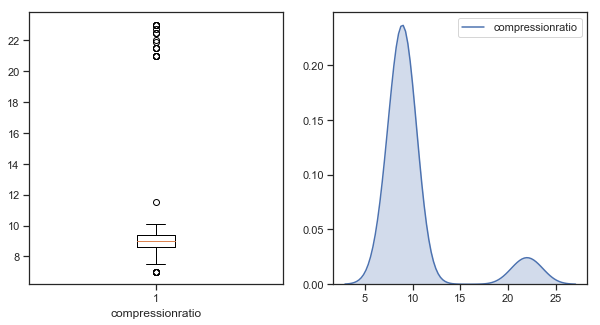

<Figure size 720x360 with 0 Axes>

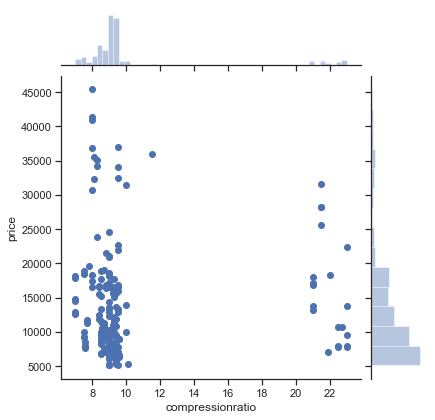

In [191]:
### compressionratio

num_plots(df.compressionratio,'compressionratio') 


# has both lower and upper outliers
df = df_new.copy()

Q1 = df.compressionratio.quantile(0.25) # first quantile 
Q3 = df.compressionratio.quantile(0.75) # second quantile
IQR = Q3 - Q1 # inter quantile range (IQR)
print(IQR)


# upper outlier
df.compressionratio[(df.compressionratio > (Q3 + 1.5 * IQR))] = df.compressionratio.quantile(0.75)

# lower outlier
df.compressionratio[(df.compressionratio < (Q1 - 1.5 * IQR))] = Q1


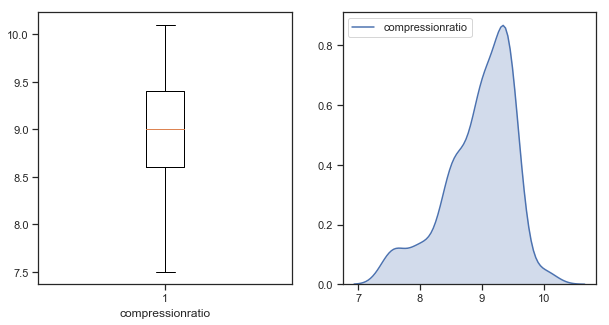

<Figure size 720x360 with 0 Axes>

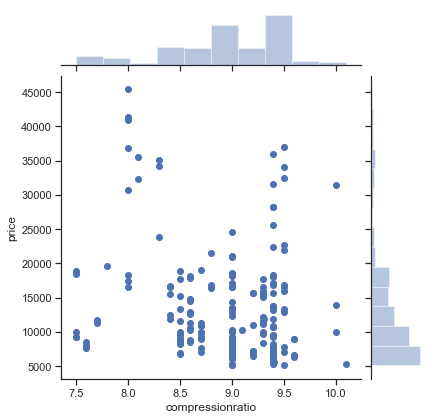

In [192]:
num_plots(df.compressionratio,'compressionratio')  # outliers are removed for imputation of 3rd quantile value

46.0


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


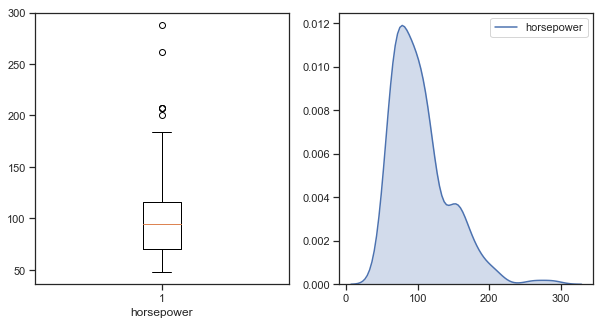

<Figure size 720x360 with 0 Axes>

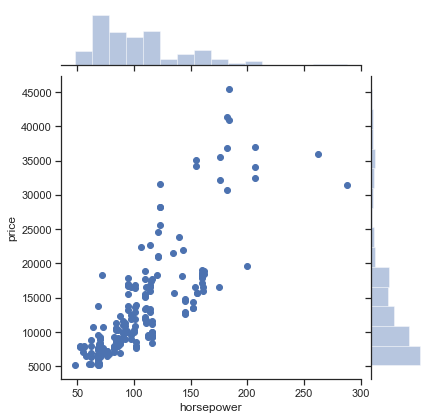

In [193]:
### horsepower

num_plots(df.horsepower,'horsepower') 


Q1 = df.horsepower.quantile(0.25) # first quantile 
Q3 = df.horsepower.quantile(0.75) # second quantile
IQR = Q3 - Q1 # inter quantile range (IQR)
print(IQR)


# upper outlier
df.horsepower[(df.horsepower > (Q3 + 1.5 * IQR))]
df.horsepower[(df.horsepower > (Q3 + 1.5 * IQR))] = df.horsepower.quantile(0.95)


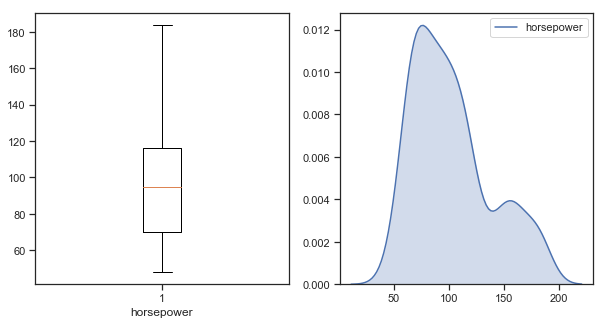

<Figure size 720x360 with 0 Axes>

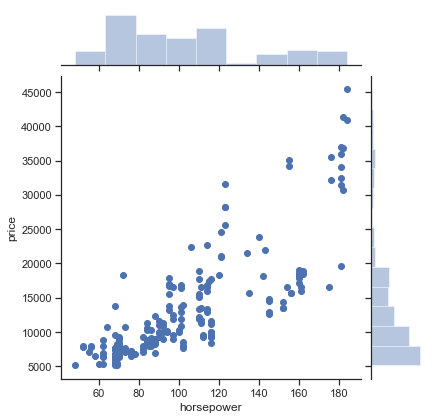

In [194]:
num_plots(df.horsepower,'horsepower')  # outliers are removed for imputation of 95th quantile value


700.0


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


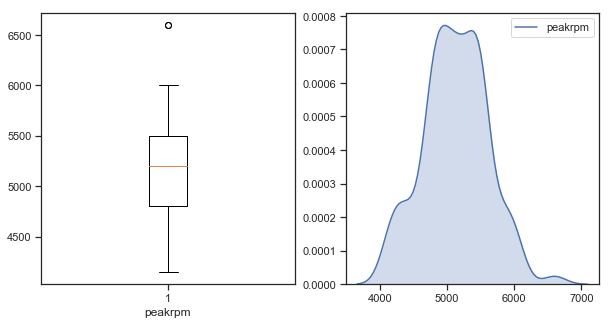

<Figure size 720x360 with 0 Axes>

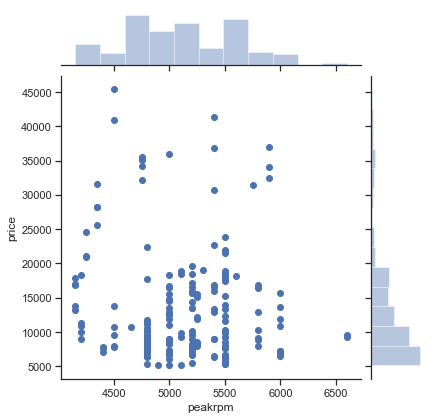

In [195]:
### peakrpm
num_plots(df.peakrpm,'peakrpm') 


Q1 = df.peakrpm.quantile(0.25) # first quantile 
Q3 = df.peakrpm.quantile(0.75) # second quantile
IQR = Q3 - Q1 # inter quantile range (IQR)
print(IQR)

 
# upper outlier
df.peakrpm[(df.peakrpm > (Q3 + 1.5 * IQR))]
df.peakrpm[(df.peakrpm > (Q3 + 1.5 * IQR))] = df.peakrpm.quantile(0.95)


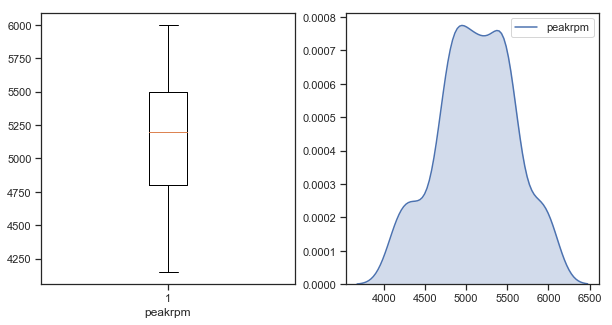

<Figure size 720x360 with 0 Axes>

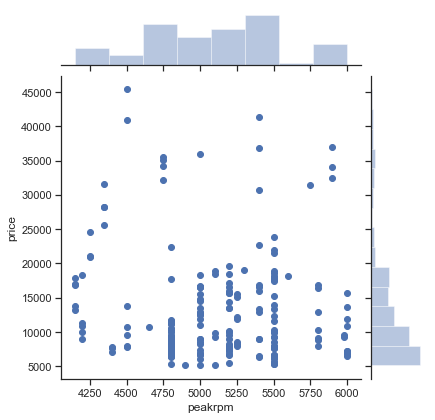

In [196]:
num_plots(df.peakrpm,'peakrpm')  # outliers are removed for imputation of 95th quantile value


11.0


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


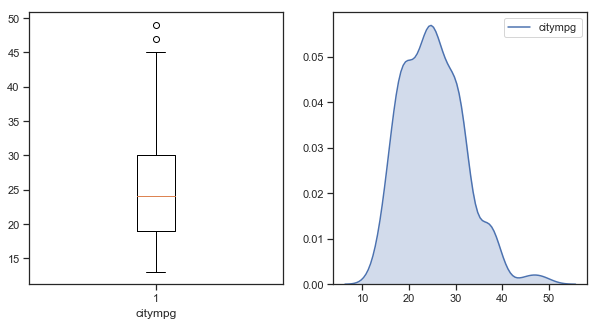

<Figure size 720x360 with 0 Axes>

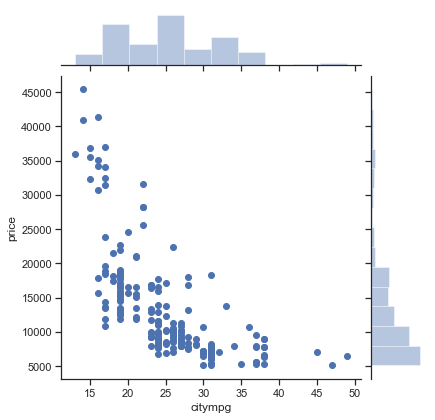

In [197]:
### citympg
num_plots(df.citympg,'citympg') 


Q1 = df.citympg.quantile(0.25) # first quantile 
Q3 = df.citympg.quantile(0.75) # second quantile
IQR = Q3 - Q1 # inter quantile range (IQR)
print(IQR)

 
# upper outlier
df.citympg[(df.citympg > (Q3 + 1.5 * IQR))]
df.citympg[(df.citympg > (Q3 + 1.5 * IQR))] = df.citympg.quantile(0.95)


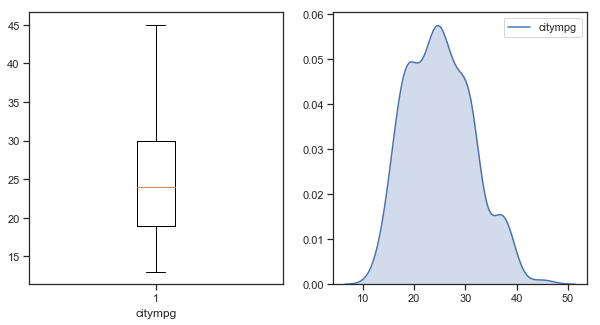

<Figure size 720x360 with 0 Axes>

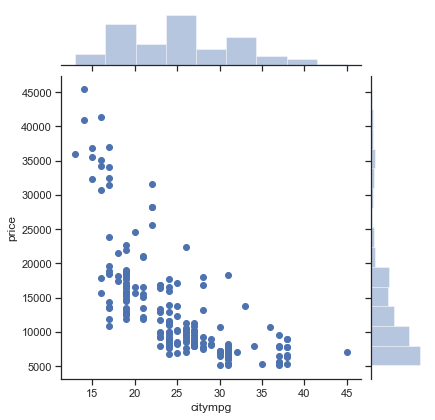

In [198]:
num_plots(df.citympg,'citympg')  # outliers are removed for imputation of 95th quantile value


9.0


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


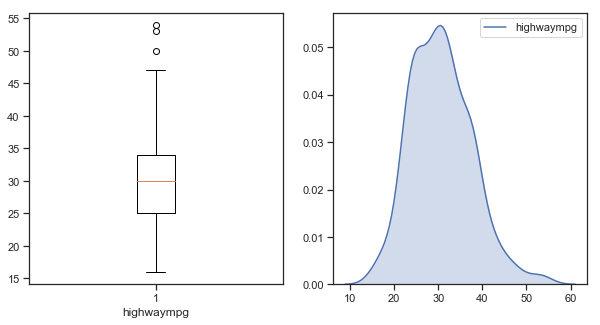

<Figure size 720x360 with 0 Axes>

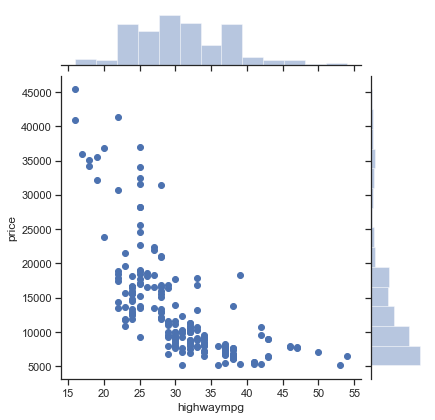

In [199]:
### highwaympg

num_plots(df.highwaympg,'highwaympg') 


Q1 = df.highwaympg.quantile(0.25) # first quantile 
Q3 = df.highwaympg.quantile(0.75) # second quantile
IQR = Q3 - Q1 # inter quantile range (IQR)
print(IQR)

 
# upper outlier
df.highwaympg[(df.highwaympg > (Q3 + 1.5 * IQR))]
df.highwaympg[(df.highwaympg > (Q3 + 1.5 * IQR))] = df.highwaympg.quantile(0.95)



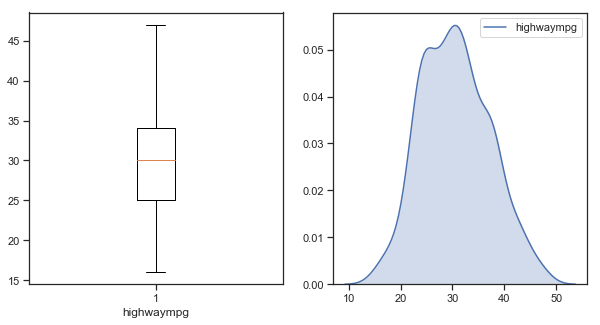

<Figure size 720x360 with 0 Axes>

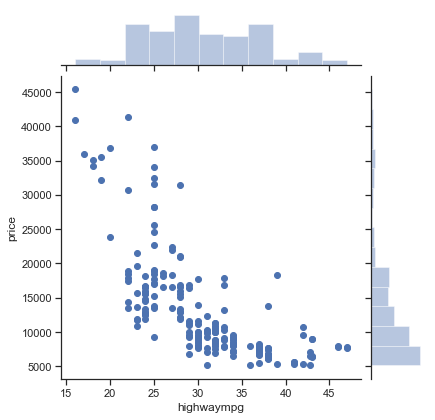

In [200]:
num_plots(df.highwaympg,'highwaympg')  # outliers are removed for imputation of 95th quantile value


### categorical data EDA
###### there are only 205 rows, and with increase of columns spacity in the data will increase, which can lead to overfitting of the data
#### so we will try to recude categories on the basis of statistics as possible as we can


In [201]:
def cat_plot(xlable):
    sns.set(style="white", palette="muted", color_codes=True)
    f, axes = plt.subplots(1, 3, figsize=(14, 7), sharex=True)
    sns.despine(left=True)
    sns.boxplot(x=xlable, y="price", data=df,ax=axes[0])
    axes[0].set_title("Boxplot")
    sns.barplot(x=xlable, y="price", data=df,estimator=np.mean, ax=axes[1])
    axes[1].set_title("Barplot with mean estimator")
    sns.countplot(x=xlable,data=df,ax=axes[2])
    axes[2].set_title("Countplot") 
    plt.tight_layout()


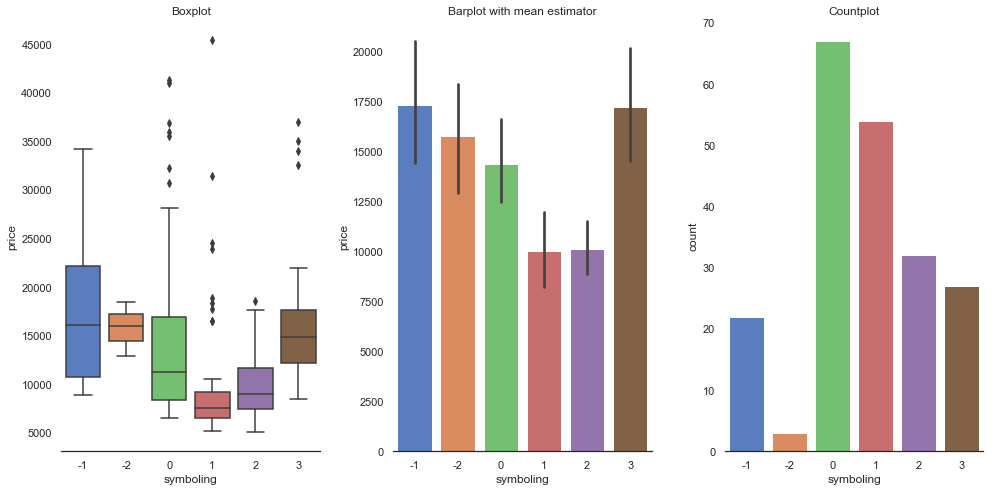

In [202]:
###### symboling
cat_plot('symboling')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


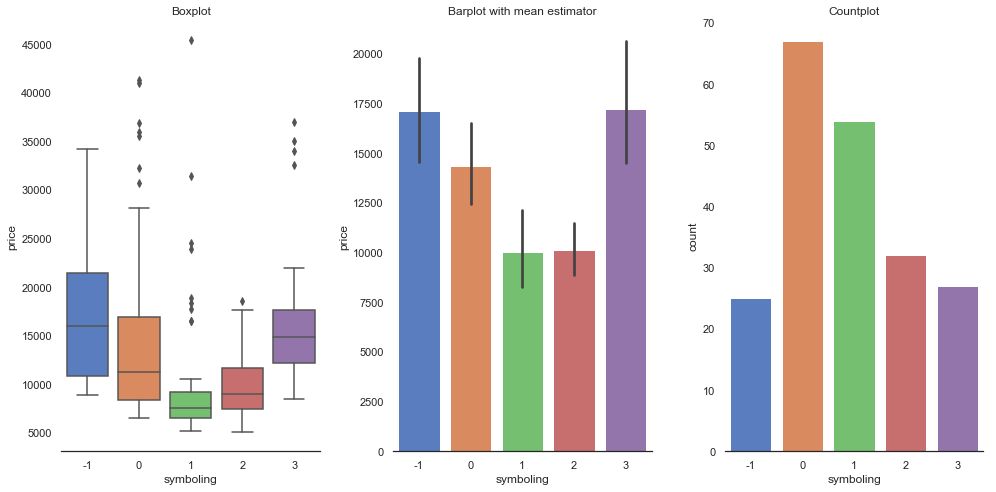

In [203]:
# category -2 is present in only 3 rows and average value of price in '-2' very close to average value of price in '-1'
# so we can replace '-2' with '-1' 

df.symboling[df.symboling=='-2'] = '-1'

cat_plot('symboling')

#### NOTES:
##### 1. cars with sybmboling value equals to zero and one are higher in count
##### 2. cars with high risk i.e -1 and lowest risk factor are considerably more expensive than others

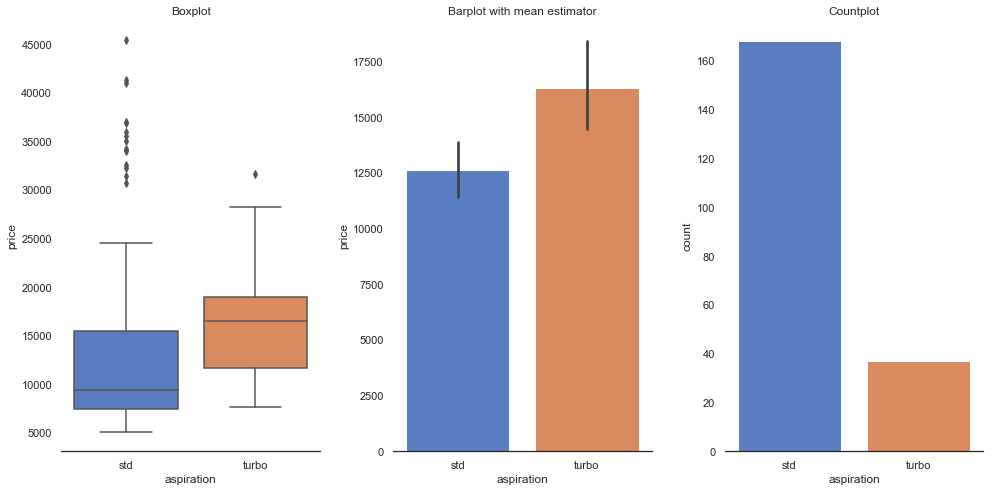

In [204]:
######## aspiration
cat_plot('aspiration')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


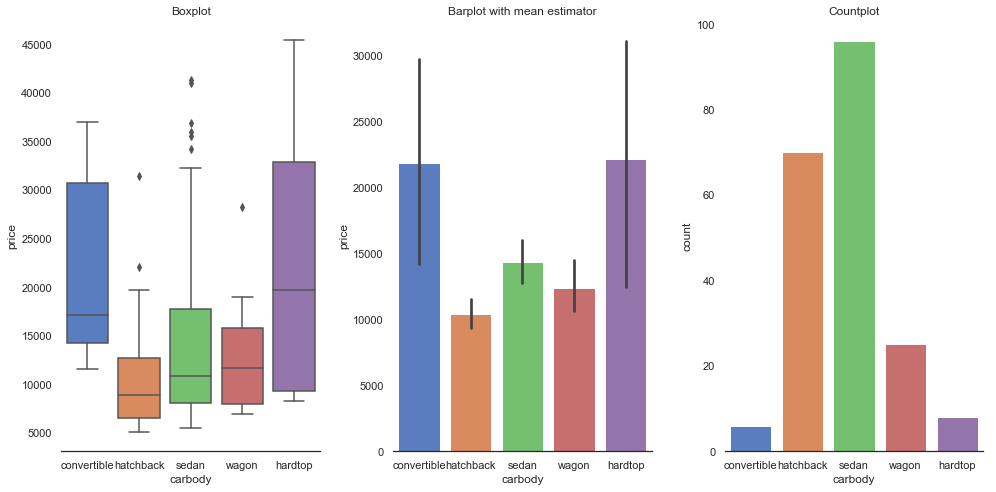

In [205]:
########  carbody
cat_plot('carbody')

df.carbody.unique()

df.carbody[(df.carbody=='convertible')|(df.carbody=='hardtop')]='con_hard'


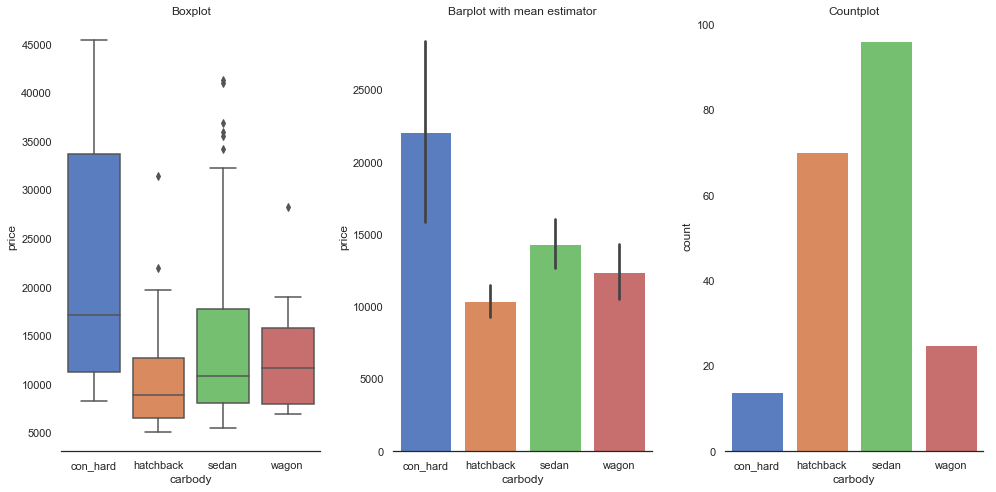

In [206]:
cat_plot('carbody')

#### NOTES:
##### 1. Number of sedans are high in number followed by hatchback
##### 2. con_hard are most expensive car body type than others

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


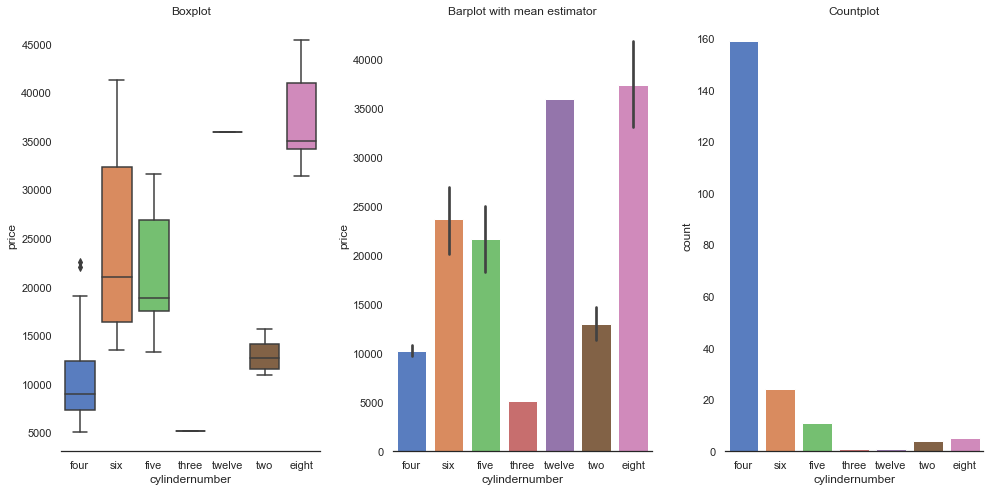

In [207]:
######## cylindernumber

cat_plot('cylindernumber')
# making 'two','three','four' as a category 'two_three_four'
# making 'five','six' as a category 'five_six'
# making 'eight','twelve' as a category 'eight_twelve'

df.cylindernumber[(df.cylindernumber=='two')|(df.cylindernumber=='three')|(df.cylindernumber=='four')]='two_three_four'
df.cylindernumber[(df.cylindernumber=='five')|(df.cylindernumber=='six')] ='five_six'
df.cylindernumber[(df.cylindernumber=='eight')|(df.cylindernumber=='twelve')] ='eight_twelve'


In [208]:
# percentage of cars with four cylinders
len(df_new.cylindernumber[df_new.cylindernumber=='four'])/len(df_new.cylindernumber)

0.775609756097561

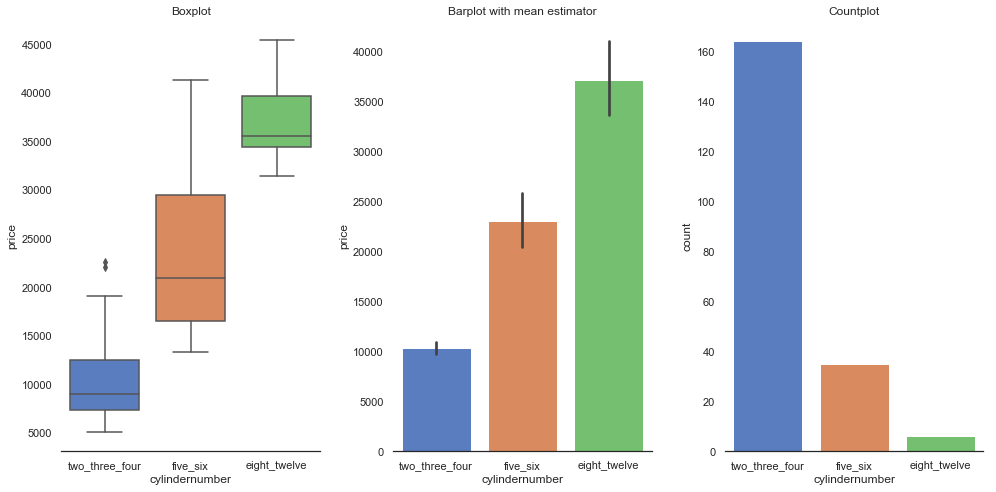

In [209]:
cat_plot('cylindernumber')

#### NOTES:
###### 1. cars having four cylinders are considerbly highest in counts than others       (approximately 77%)
###### 2. cars with eight and twelve cylinders are most expensive ones

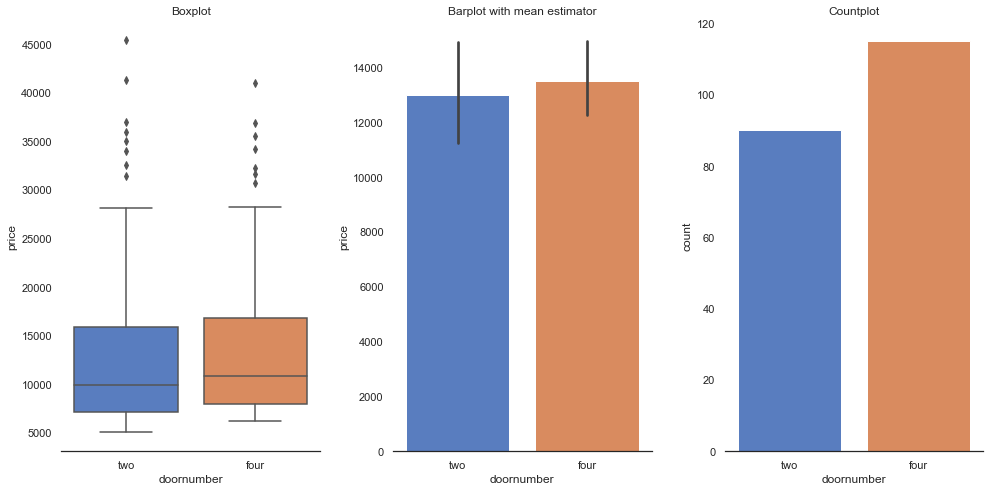

In [210]:
########  doornumber
cat_plot('doornumber')

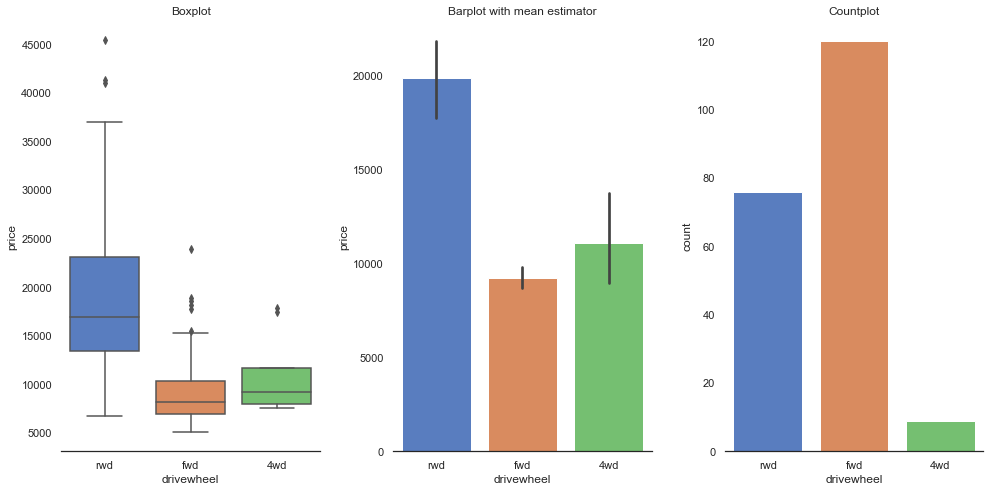

In [211]:
######  drivewheel
cat_plot('drivewheel')

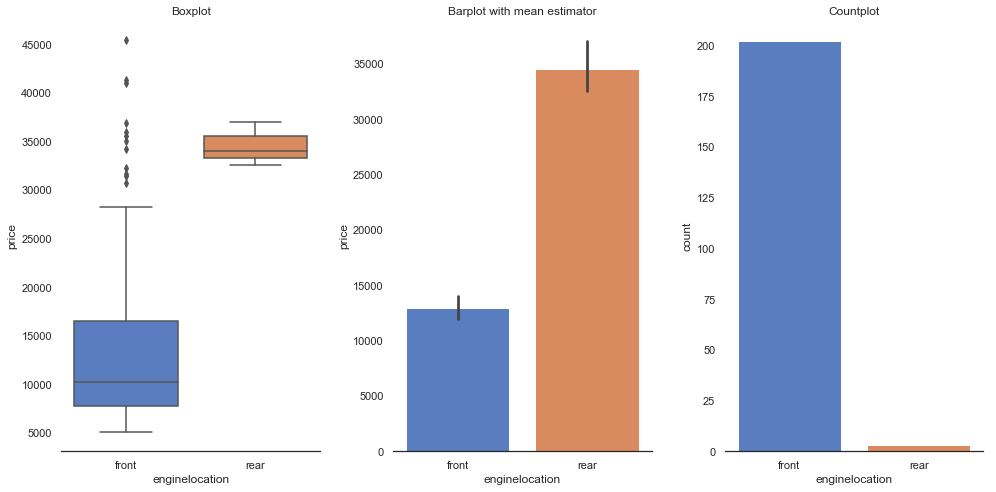

In [212]:
#######  enginelocation
cat_plot('enginelocation')

In [213]:
# 99% of data in this column has only one category i.e 'front'
# so we will drop this column as it will not contribute much in model performance

df.drop(columns=['enginelocation'],inplace=True)


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


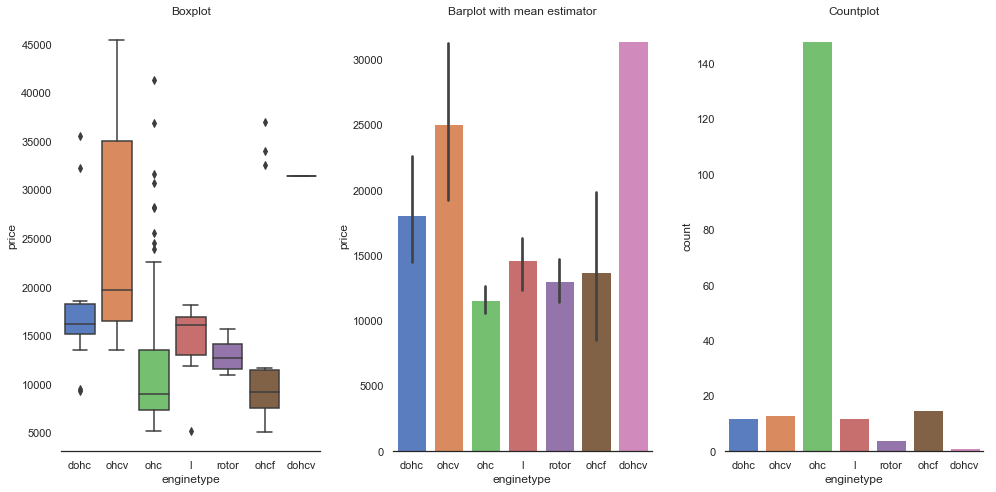

In [214]:
########  enginetype

cat_plot('enginetype')  
# making 'dohc','I','rotor' as a category 'dohc_I_rotor'
# making 'ohc','ohcf' as a category 'ohc_ohcf'
# making 'ohcv','dohcv' as a category 'ohcv_dohcv'
df.enginetype.unique()
df.enginetype[(df.enginetype=='dohc')|(df.enginetype=='I')|(df.enginetype=='rotor')]='dohc_I_rotor'
df.enginetype[(df.enginetype=='ohc')|(df.enginetype=='ohcf')]='ohc_ohcf'
df.enginetype[(df.enginetype=='ohcv')|(df.enginetype=='dohcv')]='ohcv_dohcv'

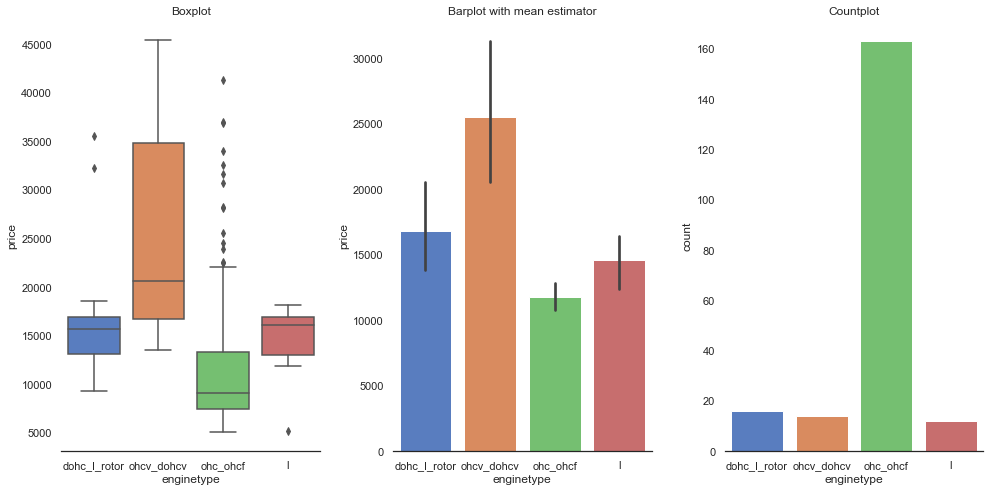

In [215]:
cat_plot('enginetype') 

#### NOTES:
##### 1. 'ohc' engine type is highest in number.
###### 2. 'ohcv' is the costliest among other engine type cars.

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


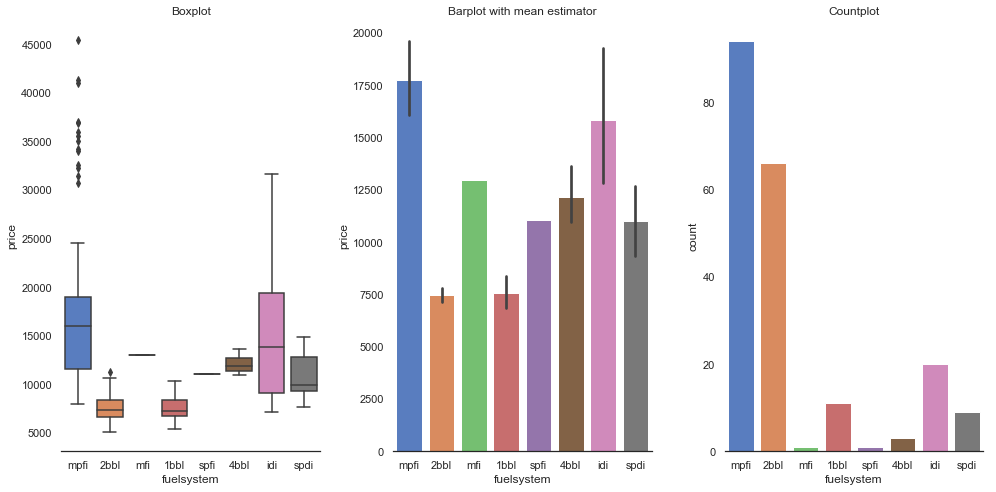

In [216]:
########  fuelsystem
cat_plot('fuelsystem')   
# making '2bbl','1bbl' as a category '2bbl_1bbl'
# making 'mfi','spfi','4bbl','spdi' as a category 'mfi_spfi_4bbl_spdi'
df.fuelsystem.unique()
df.fuelsystem.value_counts()

df.fuelsystem[(df.fuelsystem=='2bbl')|(df.fuelsystem=='1bbl')]='2bbl_1bbl'
df.fuelsystem[(df.fuelsystem=='mfi')|(df.fuelsystem=='spfi')|(df.fuelsystem=='4bbl')|(df.fuelsystem=='spdi')]='mfi_spfi_4bbl_spdi'

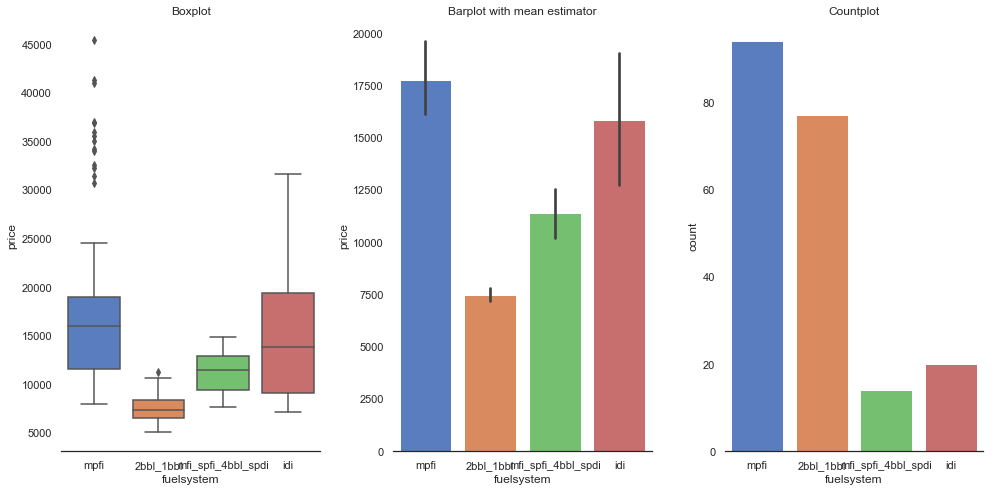

In [217]:
cat_plot('fuelsystem') 

#### NOTES:
##### 'mpfi' fuel system is higher in number and costliest than other suel systems

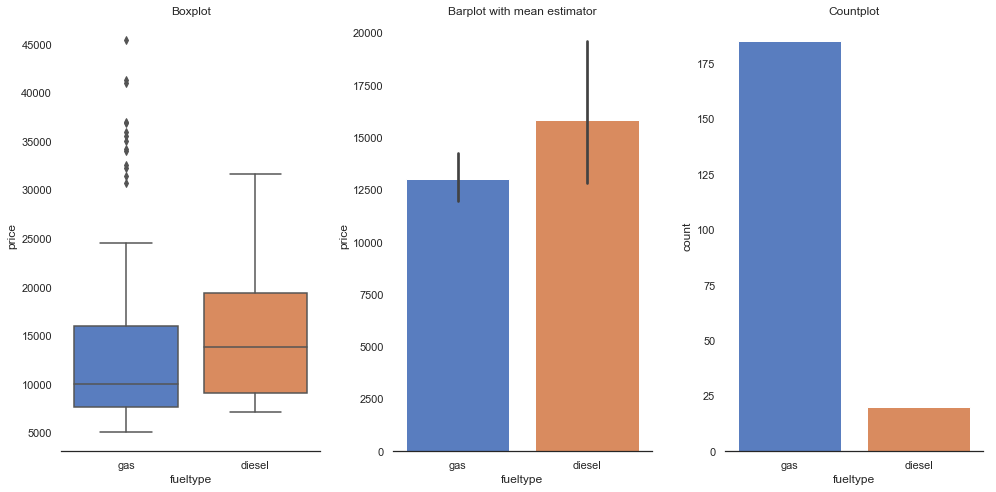

In [218]:
########  fueltype
cat_plot('fueltype')


#### NOTES:
##### 1. 'gas' cars are produced higher in number than 'diasel' cars
##### 2. 'diesel' cars are bit costlier than 'gas' cars

147

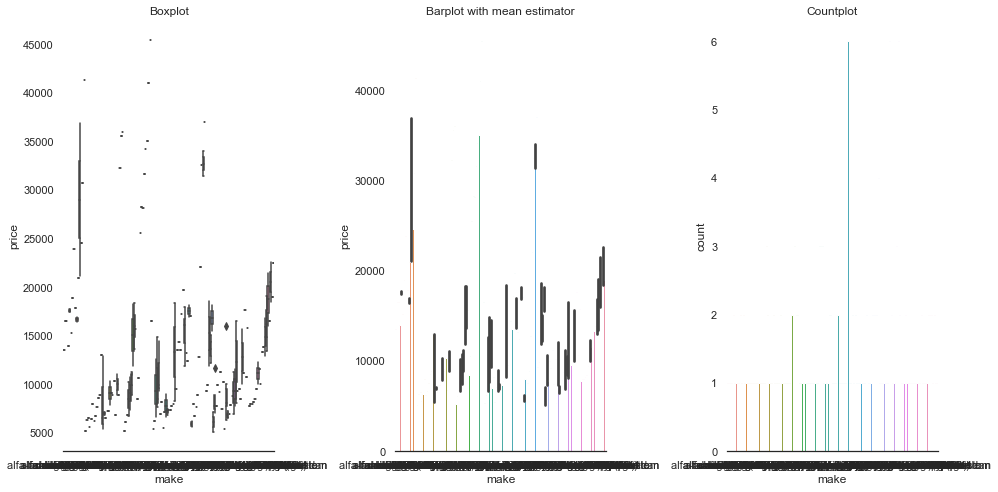

In [219]:
#######  make
cat_plot('make')
len(df.make.unique())
# there are 147 categories, can build model with this many categories
# droping 'make'

In [220]:
df.drop(columns=['make'],inplace=True)

## <font color='red'>Data Clean up</font>


##### dummy variable creation --> i am using pandas 'get_dummies' method to create dummy variables.


In [221]:
df = pd.get_dummies(df,drop_first=True) # converting directly to dummy variables (dataframe)

In [222]:
df.head() # total number columns after dummy variable creation are 34

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc_ohcf,enginetype_ohcv_dohcv,cylindernumber_five_six,cylindernumber_two_three_four,fuelsystem_idi,fuelsystem_mfi_spfi_4bbl_spdi,fuelsystem_mpfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,1,0,0,0,0,1,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,1,0,0,0,0,1,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,...,0,1,0,0,1,1,0,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,...,1,0,0,1,0,0,1,0,0,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,...,0,0,0,1,0,1,0,0,0,1


## Simple linear Regression Model

In [224]:
X = df.drop(columns=['price'])
y= df.price

##### Finding important features using random forest

In [228]:
model = RandomForestRegressor(n_estimators=150,max_depth=6)
model.fit(X, y)

model.feature_importances_
X.columns

# creating dataframe with feature and its importance value
# then sorting data frame accoring to importance value
feature_imp = pd.DataFrame({'features':X.columns,'importance':model.feature_importances_})
feature_imp_sorted = feature_imp.sort_values(by='importance', ascending=False)


# top six features
top_6_features = list(feature_imp_sorted.features[:6])
print('-----------------------','\n')
print('Top 6 features are: ')
print('-----------------------','\n')
print(top_6_features)

----------------------- 

Top 6 features are: 
----------------------- 

['enginesize', 'curbweight', 'highwaympg', 'horsepower', 'carwidth', 'wheelbase']


In [229]:
## checking the correlation between price and top six features
corr_result = pd.concat([y,X[top_6_features]],axis=1).corr()['price']
print(corr_result[1:])

enginesize    0.874145
curbweight    0.835305
highwaympg   -0.716512
horsepower    0.808288
carwidth      0.759325
wheelbase     0.577816
Name: price, dtype: float64


#### NOTES:
#####  Top four feature having high correlation with price are enginesize, curbweight, horsepower,carwidth.
##### We will build four simple linear regression model using above features mentioned and look after the r square value to check which model is performing the best.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

X = df[['enginesize','curbweight', 'horsepower','carwidth']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [107]:
## 1. enginesize


model = LinearRegression()
model.fit(X_train['enginesize'].to_numpy().reshape(-1,1),y_train)

ypred = model.predict(X_test['enginesize'].to_numpy().reshape(-1,1))
ypred

y_test = y_test.to_numpy().reshape(-1,1)

print('R square: ',r2_score(ypred,y_test)) 



R square:  0.685815735840374


Text(0, 0.5, 'Predicted value')

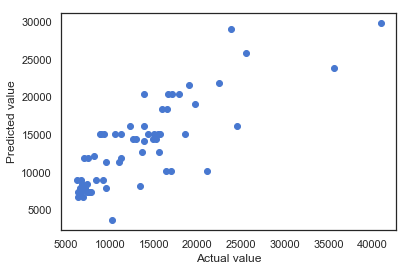

In [230]:
plt.scatter(y_test,ypred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

In [231]:
## 2. curbweight
model = LinearRegression()
model.fit(X_train['curbweight'].to_numpy().reshape(-1,1),y_train)

ypred = model.predict(X_test['curbweight'].to_numpy().reshape(-1,1))
ypred

print('R square: ',r2_score(ypred,y_test)) 

R square:  0.7295495529379918


Text(0, 0.5, 'Predicted value')

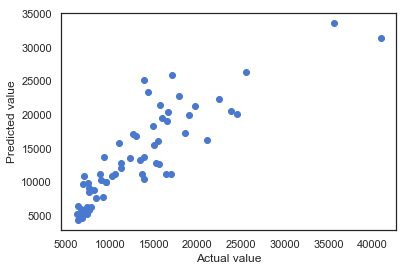

In [112]:
plt.scatter(y_test,ypred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

In [113]:
## 3. horsepower
model = LinearRegression()
model.fit(X_train['horsepower'].to_numpy().reshape(-1,1),y_train)

ypred = model.predict(X_test['horsepower'].to_numpy().reshape(-1,1))
ypred

print('R square: ',r2_score(ypred,y_test)) 

R square:  0.49142592027098564


Text(0, 0.5, 'Predicted value')

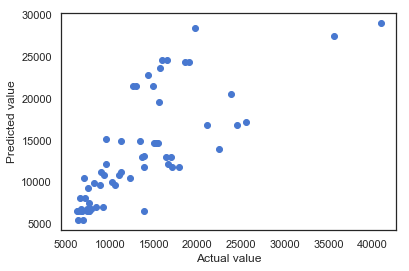

In [114]:
plt.scatter(y_test,ypred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

In [233]:
## 4. carwidth

model = LinearRegression()
model.fit(X_train['carwidth'].to_numpy().reshape(-1,1),y_train)

ypred = model.predict(X_test['carwidth'].to_numpy().reshape(-1,1))
ypred

print('R square: ',r2_score(ypred,y_test))

R square:  0.49324509816301887


Text(0, 0.5, 'Predicted value')

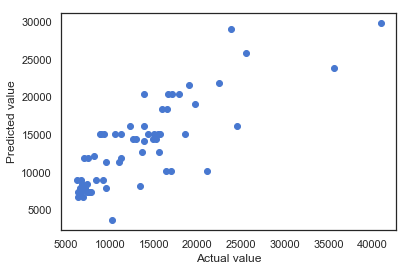

In [116]:
plt.scatter(y_test,ypred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

#### NOTES:
###### 1. 'curbweight'  gives the highest r square value followed by 'enginesize'
###### 2. Though 'curbweight'  has low correlation with 'price' than 'carwidth' and 'carlength', still 'curbweight'  has higher r square value than both of them. This states that correlation between independent variable and dependent variable can not be perfect measure to determine model performance, we have to take error measures into account like mse, mape, r square value to determine the model performance.


## Multiple Regression Model

In [219]:
### feature selection

X = df.drop(columns=['price'])
y= df.price


model = RandomForestRegressor(n_estimators=150,max_depth=6)
model.fit(X, y)

model.feature_importances_
X.columns

# creating dataframe with feature and its importance value
# then sorting data frame accoring to importance value
feature_imp = pd.DataFrame({'features':X.columns,'importance':model.feature_importances_})
feature_imp_sorted = feature_imp.sort_values(by='importance', ascending=False)


# top 10 features
top_10_features = list(feature_imp_sorted.features[0:10])
print('-------------------------------------------------------------','\n')
print('Top ten impoertant features: ','\n')
print('-------------------------------------------------------------','\n')
print(top_10_features,'\n')


## checking the correlation between price and top six features
corr_result = pd.concat([y,X[top_10_features]],axis=1).corr()['price']
print('-------------------------------------------------------------','\n')
print('Correlation between \'price\' and top ten impoertant features: ','\n')
print('-------------------------------------------------------------','\n')
print(corr_result[1:])

------------------------------------------------------------- 

Top ten impoertant features:  

------------------------------------------------------------- 

['enginesize', 'curbweight', 'highwaympg', 'horsepower', 'carwidth', 'wheelbase', 'carlength', 'citympg', 'peakrpm', 'stroke'] 

------------------------------------------------------------- 

Correlation between 'price' and top ten impoertant features:  

------------------------------------------------------------- 

enginesize    0.874145
curbweight    0.835305
highwaympg   -0.716512
horsepower    0.808288
carwidth      0.759325
wheelbase     0.550635
carlength     0.682920
citympg      -0.701922
peakrpm      -0.081702
stroke        0.079443
Name: price, dtype: float64


In [220]:
########### multiple regression model on selected features
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X = df[top_10_features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [221]:
## k nearest neighbors model
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)

ypred = model.predict(X_test)


print(r2_score(ypred,y_test))
print('mse value: ',mean_squared_error(ypred,y_test))
print('rmse value: ',(mean_squared_error(ypred,y_test)) ** .5)
print('mape value: ',np.mean(np.abs((y_test - ypred) / y_test)) * 100)

0.8627378255228122
mse value:  7143822.487903226
rmse value:  2672.7930125438493
mape value:  13.989432941682987


In [222]:
# random forest model
model = RandomForestRegressor(n_estimators=150,max_depth=6)
model.fit(X_train, y_train)

ypred = model.predict(X_test)


print(r2_score(ypred,y_test)) 
print('mse value: ',mean_squared_error(ypred,y_test))
print('rmse value: ',(mean_squared_error(ypred,y_test)) ** .5)
print('mape value: ',np.mean(np.abs((y_test - ypred) / y_test)) * 100)

0.9144150628735106
mse value:  4987884.681645695
rmse value:  2233.3572669068635
mape value:  13.537374164699948


In [223]:
model = GradientBoostingRegressor(loss='ls', alpha=0.70,
                                n_estimators=150, max_depth=5,
                                learning_rate=.4, min_samples_leaf=9,
                                min_samples_split=9)

model.fit(X_train, y_train)

ypred = model.predict(X_test)


print(r2_score(ypred,y_test)) 
print('mse value: ',mean_squared_error(ypred,y_test))
print('rmse value: ',(mean_squared_error(ypred,y_test)) ** .5)
print('mape value: ',np.mean(np.abs((y_test - ypred) / y_test)) * 100)

0.925542963355124
mse value:  5337515.096680189
rmse value:  2310.3062776783922
mape value:  12.789572483374673


##### From above three build models random forest regressor gives the best result

## <font color='red'>conclusion and interpretation of model in terms of data</font>

##### 1. we have used 10 features to build this model and they are: enginesize, curbweight, highwaympg, horsepower, carwidth, wheelbase, carlength, peakrpm, citympg, compressionratio.
                
 ##### 2. enginesize, curbweight, horsepower,  has high correlation with price which makes sense as eigine size and horsepower of a car increases the power of car increase making it expensive.
 
 ###### 3. 'carwidth' and 'carlength' had the high correlation with 'price' but there importance for model building is lesser than low corellation features like 'curbweight','wheelbase' because error calculated for 'carwidth' and 'carlength' are higher than 'curbweight','wheelbase'.
 
 ##### 4. All top 10 important features are numerical/contineous data type, no catagorical data type made it to the top 10 important list. This might have happened because most of categorical features are concentrated to a perticular category      
 e.g in 'enginetype' there are total 7 categories and category 'ohc' is present in 148 rows out of 204 which is 72% of total data. This can make a categorical data hard to be part of a predictive model. 
 ##### Although they played vital role in the analytics of the price of car, there role in building the machine learning model were very little.  